In [1]:
#Author:Harindranath Ambalampitiya, PhD (Theoretical physics)
import torch
import torch.nn as nn
import torch.nn.functional as Fun
import numpy as np
from numpy import pi,sin,cos
import matplotlib.pyplot as plt
import imageio

In [2]:
#Data creation for non-linear regression
#Data is simulating a single slit diffraction pattern
#model parameters, i.e.,number of independent and
#dependent variables and hidden layers
input_size=1
output_size=1
n_hidden=256
#Prepare the physics based data
#number of samples for  training and test
nsamp=500
x_data=torch.zeros((nsamp,1))
y_data=torch.zeros((nsamp,1))
x_test_data=torch.zeros((nsamp,1))

In [3]:
for i in range(0,nsamp):
    phi=-4.*pi+8.*pi*np.random.ranf()
    x_data[i]=phi
    x_test_data[i]=-4.*pi+i*8.*pi/nsamp
    y_data[i]=(sin(phi/2.)/(phi/2.))**2
    #add some noise to y_data
    y_data[i]=y_data[i]-0.075+.15*np.random.ranf()
    


#Data normalization
def normalize(x):
    x_normed = x / x.max(0, keepdim=True)[0]
    return x_normed

x_data=normalize(x_data)
y_data=normalize(y_data)
x_test_data=normalize(x_test_data)

In [4]:
class NonLinearRegression(nn.Module):
    def __init__(self,input_size,n_hidden,output_size):
        super(NonLinearRegression,self).__init__()
        self.hidden=nn.Linear(input_size, n_hidden)
        self.predict=nn.Linear(n_hidden,output_size)
    
    def forward(self,x):
        y_out=Fun.relu(self.hidden(x))
        return self.predict(y_out)
    
#Model description
model=NonLinearRegression(input_size,n_hidden,output_size)
#Mean squared error (MSE) loss function
criterion=nn.MSELoss()
#stochastic gradient descent (SGD) optimization
#lr is the learning-rate
optimizer=torch.optim.SGD(model.parameters(),lr=0.05)


In [7]:
for epoch in range(5000):
    
    #initial prediction with a forward-pass
    y_predict=model(x_data)
    
    #compute the error functin
    loss=criterion(y_predict,y_data)
    #minimize error with gradients
    optimizer.zero_grad()
    #update the weights
    loss.backward()
    optimizer.step()

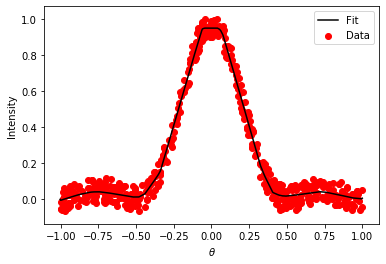

In [10]:
y_new=model(x_test_data).detach()
plt.scatter(x_data,y_data,label='Data',c='r')
plt.plot(x_test_data,y_new,label='Fit',c='black')
plt.xlabel(r'$\theta$')
plt.ylabel('Intensity')
plt.legend()